In [1]:
%matplotlib inline

In [20]:
import pandas
import numpy
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

data_df = pandas.read_csv('da_blast_data.csv')
data_df['log(T)'] = numpy.log(data_df['#T'])
data_df['log(R)'] = numpy.log(data_df['R'])

In [72]:
data_df

,#T,R,log(T),log(R)
0,0.10,11.1,-2.302585,2.406945
1,0.24,19.9,-1.427116,2.990720
2,0.38,25.4,-0.967584,3.234749
3,0.52,28.8,-0.653926,3.360375
4,0.66,31.9,-0.415515,3.462606
5,0.80,34.2,-0.223144,3.532226
6,0.94,36.3,-0.061875,3.591818
7,1.08,38.9,0.076961,3.660994
8,1.22,41.0,0.198851,3.713572
9,1.36,42.8,0.307485,3.756538


In [43]:
import statsmodels.api as sm
X = data_df['log(T)']
X = sm.add_constant(X)
y = data_df['log(R)']

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log(R)   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     2886.
Date:                Sat, 21 Jan 2017   Prob (F-statistic):           1.11e-25
Time:                        21:53:42   Log-Likelihood:                 35.659
No. Observations:                  25   AIC:                            -67.32
Df Residuals:                      23   BIC:                            -64.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.5903      0.014    258.645      0.000         3.562     3.619
log(T)         0.4058      0.008     53.720      0.000         0.390     0.421
==============================================================================
Omnibus:                       42.113   Durbin-Watson:                   0.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.330
Skew:                          -3.086   Prob(JB):                     1.13e-34
Kurtosis:                      13.583   Cond. No.                         2.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
results.params

const     3.590348
log(T)    0.405823
dtype: float64

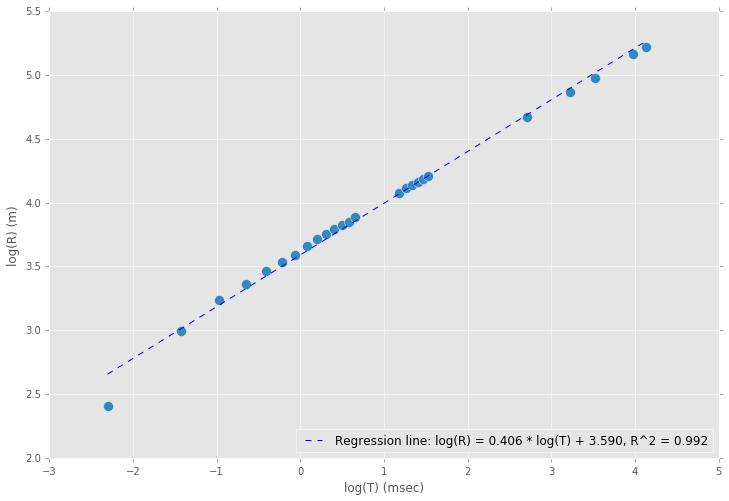

In [74]:
axes = data_df.plot.scatter(x='log(T)', y='log(R)', figsize=(12, 8), s=100)
axes.add_line(plt.Line2D(data_df['log(T)'], results.predict(X), ls='--',
             label='Regression line: log(R) = {m:.3f} * log(T) + {c:.3f}, R^2 = {r2:.3f}'
            .format(m=results.params['log(T)'], c=results.params['const'], r2=results.rsquared)))
axes.set_xlabel('log(T) (msec)')
axes.set_ylabel('log(R) (m)')
axes.legend(loc=4)

In [86]:
# Realized that the time given was in milliseconds, converting to seconds and repeatin the process
data_df['T_sec'] = data_df['#T'] / 1000
data_df['log(T_sec)'] = numpy.log(data_df['T_sec'])

X_sec = data_df['log(T_sec)']
X_sec = sm.add_constant(X_sec)
y = data_df['log(R)']

sec_model = sm.OLS(y, X_sec)
sec_results = sec_model.fit()
sec_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log(R)   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     2886.
Date:                Sun, 29 Jan 2017   Prob (F-statistic):           1.11e-25
Time:                        12:36:21   Log-Likelihood:                 35.659
No. Observations:                  25   AIC:                            -67.32
Df Residuals:                      23   BIC:                            -64.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.3937      0.047    136.028      0.000         6.296     6.491
log(T_sec)     0.4058      0.008     53.720      0.000         0.390     0.421
==============================================================================
Omnibus:                       42.113   Durbin-Watson:                   0.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.330
Skew:                          -3.086   Prob(JB):                     1.13e-34
Kurtosis:                      13.583   Cond. No.                         24.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

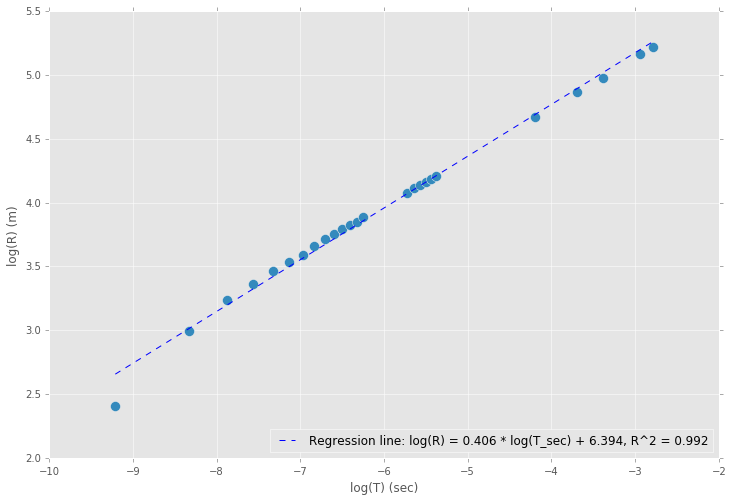

In [87]:
axes = data_df.plot.scatter(x='log(T_sec)', y='log(R)', figsize=(12, 8), s=100)
axes.add_line(plt.Line2D(data_df['log(T_sec)'], sec_results.predict(X_sec), ls='--',
             label='Regression line: log(R) = {m:.3f} * log(T_sec) + {c:.3f}, R^2 = {r2:.3f}'
            .format(m=sec_results.params['log(T_sec)'], c=sec_results.params['const'], r2=sec_results.rsquared)))
axes.set_xlabel('log(T) (sec)')
axes.set_ylabel('log(R) (m)')
axes.legend(loc=4)

In [90]:
data_df

,#T,R,log(T),log(R),T_sec,log(T_sec)
0,0.10,11.1,-2.302585,2.406945,0.00010,-9.210340
1,0.24,19.9,-1.427116,2.990720,0.00024,-8.334872
2,0.38,25.4,-0.967584,3.234749,0.00038,-7.875339
3,0.52,28.8,-0.653926,3.360375,0.00052,-7.561682
4,0.66,31.9,-0.415515,3.462606,0.00066,-7.323271
5,0.80,34.2,-0.223144,3.532226,0.00080,-7.130899
6,0.94,36.3,-0.061875,3.591818,0.00094,-6.969631
7,1.08,38.9,0.076961,3.660994,0.00108,-6.830794
8,1.22,41.0,0.198851,3.713572,0.00122,-6.708904
9,1.36,42.8,0.307485,3.756538,0.00136,-6.600271
